In [1]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
abc=pd.read_csv(r"D:\imarticus\machin learning\excel sheets for ml\Fish_dataset.csv")
abc

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
abc.drop(abc.index[[40]], inplace=True)

In [5]:
abc['Weight']=np.sqrt((abc['Weight']))

In [6]:
abc['Weight']

0      15.556349
1      17.029386
2      18.439089
3      19.052559
4      20.736441
         ...    
154     3.492850
155     3.660601
156     3.492850
157     4.438468
158     4.460942
Name: Weight, Length: 158, dtype: float64

In [7]:
abc

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,15.556349,23.2,25.4,30.0,11.5200,4.0200
1,Bream,17.029386,24.0,26.3,31.2,12.4800,4.3056
2,Bream,18.439089,23.9,26.5,31.1,12.3778,4.6961
3,Bream,19.052559,26.3,29.0,33.5,12.7300,4.4555
4,Bream,20.736441,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,3.492850,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,3.660601,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,3.492850,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,4.438468,13.2,14.3,15.2,2.8728,2.0672


In [8]:
abc.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [9]:
xyz=abc.Species.value_counts(dropna=False)
xyz

Perch        56
Bream        35
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:ylabel='Species'>

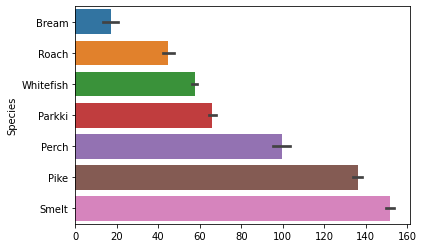

In [10]:
sns.barplot(x=abc.index,y=abc['Species'],data=abc)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

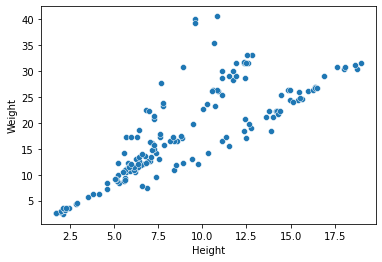

In [11]:
sns.scatterplot(x='Height',y='Weight',data=abc)

In [12]:
abc.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [13]:
abc=abc.drop(['Species'],axis=1)

In [14]:
abc.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,17.828850,26.293038,28.465823,31.280380,8.986790,4.424232
std,9.138277,10.011427,10.731707,11.627605,4.295191,1.689010
min,2.428992,7.500000,8.400000,8.800000,1.728400,1.047600
25%,11.010923,19.150000,21.000000,23.200000,5.940600,3.398650
50%,16.776049,25.300000,27.400000,29.700000,7.789000,4.277050
75%,25.495098,32.700000,35.750000,39.675000,12.371850,5.586750
max,40.620192,59.000000,63.400000,68.000000,18.957000,8.142000


<AxesSubplot:>

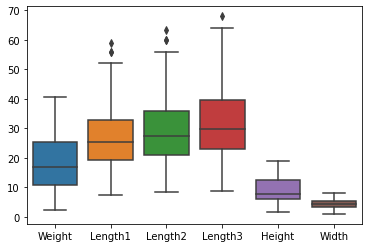

In [15]:
sns.boxplot(data=abc)

<AxesSubplot:ylabel='Weight'>

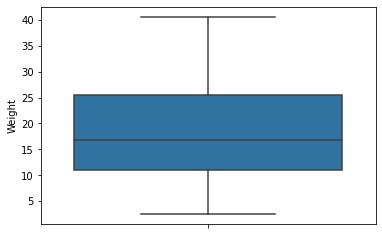

In [16]:
sns.boxplot(y='Weight',data=abc)

<AxesSubplot:ylabel='Length1'>

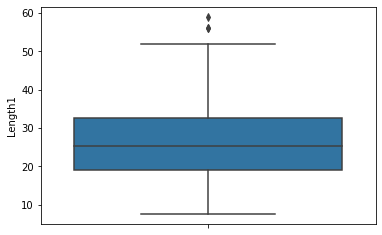

In [17]:
sns.boxplot(y='Length1',data=abc)

In [18]:
q1 = abc['Length1'].quantile(0.25)
q3 = abc['Length1'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

53.025000000000006

In [19]:
abc['Length1']=np.where(abc['Length1'] > upper_limit,upper_limit,abc['Length1']) # upper limit

<AxesSubplot:ylabel='Length1'>

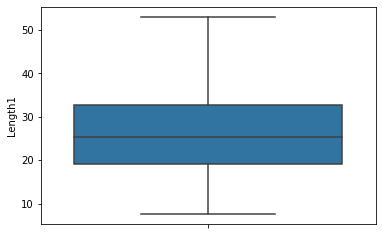

In [20]:
sns.boxplot(y='Length1',data=abc)

<AxesSubplot:ylabel='Length2'>

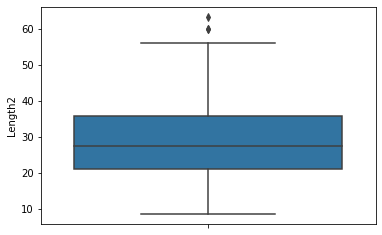

In [21]:
sns.boxplot(y="Length2",data=abc)

In [22]:
q1 = abc['Length2'].quantile(0.25)
q3 = abc['Length2'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

57.875

In [23]:
abc['Length2']=np.where(abc['Length2'] > upper_limit,upper_limit,abc['Length2']) # upper limit

<AxesSubplot:ylabel='Length2'>

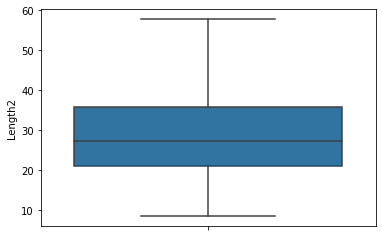

In [24]:
sns.boxplot(y="Length2",data=abc)

<AxesSubplot:ylabel='Length3'>

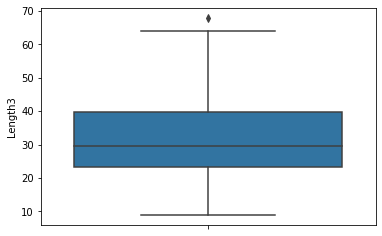

In [25]:
sns.boxplot(y="Length3",data=abc)

In [26]:
q1 = abc['Length3'].quantile(0.25)
q3 = abc['Length3'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

64.38750000000002

In [27]:
abc['Length3']=np.where(abc['Length3'] > upper_limit,upper_limit,abc['Length3']) # upper limit

<AxesSubplot:ylabel='Length3'>

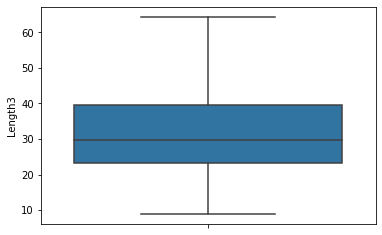

In [28]:
sns.boxplot(y='Length3',data=abc)

In [29]:
abc.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,17.828850,26.217563,28.403956,31.257516,8.986790,4.424232
std,9.138277,9.788868,10.547588,11.558287,4.295191,1.689010
min,2.428992,7.500000,8.400000,8.800000,1.728400,1.047600
25%,11.010923,19.150000,21.000000,23.200000,5.940600,3.398650
50%,16.776049,25.300000,27.400000,29.700000,7.789000,4.277050
75%,25.495098,32.700000,35.750000,39.675000,12.371850,5.586750
max,40.620192,53.025000,57.875000,64.387500,18.957000,8.142000


In [30]:
abc.head()

,Weight,Length1,Length2,Length3,Height,Width
0,15.556349,23.2,25.4,30.0,11.5200,4.0200
1,17.029386,24.0,26.3,31.2,12.4800,4.3056
2,18.439089,23.9,26.5,31.1,12.3778,4.6961
3,19.052559,26.3,29.0,33.5,12.7300,4.4555
4,20.736441,26.5,29.0,34.0,12.4440,5.1340


# SPLITTING DATA

In [31]:
X = abc.drop('Weight', axis= 1)


y = abc[['Weight']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=11000)

In [32]:
abc= pd.concat([y_train, X_train], axis=1)
abc.head()

,Weight,Length1,Length2,Length3,Height,Width
78,8.831761,16.8,18.7,19.4,5.1992,3.1234
122,28.635642,37.1,40.0,42.5,11.1350,6.6300
2,18.439089,23.9,26.5,31.1,12.3778,4.6961
66,11.832160,19.0,20.7,23.2,8.5376,3.2944
107,17.320508,26.9,28.7,30.1,7.5852,4.6354


In [33]:
abc.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.946702,0.951255,0.961901,0.796852,0.950234
Length1,0.946702,1.000000,0.999505,0.992830,0.626192,0.873811
Length2,0.951255,0.999505,1.000000,0.994768,0.637677,0.878996
Length3,0.961901,0.992830,0.994768,1.000000,0.691632,0.881082
Height,0.796852,0.626192,0.637677,0.691632,1.000000,0.799355
Width,0.950234,0.873811,0.878996,0.881082,0.799355,1.000000


<AxesSubplot:>

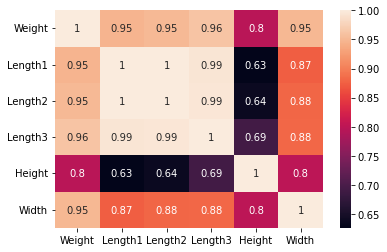

In [34]:
sns.heatmap(abc.corr(),annot=True)

<AxesSubplot:title={'center':'enginevsresales'}, xlabel='Length3', ylabel='Weight'>

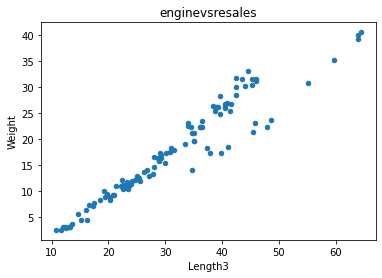

In [55]:
abc.plot.scatter(x='Length3', y='Weight', title='enginevsresales')

#### length3 have 96%  strong positve correlation with weight

* length3 have high impact on weight
* There is  colinearity in data 

# hyp

H0 :- There is no Linear relationship between WEIGHT and other variables 

Vs

H1 :- There is Linear relationship between weight and  other veriable 

Alpha = 0.05 (5%)

In [36]:
X1=abc.drop(['Weight'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],
                          index=X1.columns)  
series_before


Length1    10545.368807
Length2    16902.161058
Length3     2902.816536
Height        56.066334
Width        105.449849
dtype: float64

In [37]:
X1.shape[1]

5

In [38]:
X1.columns

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [39]:
X1=abc.drop(['Weight','Width','Length2','Length3'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Length1    8.418895
Height     8.418895
dtype: float64

In [59]:
import statsmodels.formula.api as smf
model = smf.ols('Weight ~+Height+Width+Length3',data=abc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1562.
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.54e-87
Time:                        09:51:59   Log-Likelihood:                -190.96
No. Observations:                 110   AIC:                             389.9
Df Residuals:                     106   BIC:                             400.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9523      0.382    -18.177      0.000      -7.711      -6.194
Height         0.2711      0.053      5.113      0.000       0.166       0.376
Width          1.9751      0.205      9.651      0.000       1.569       2.381
Length3        0.4340      0.024     18.456      0.000       0.387       0.481
==============================================================================
Omnibus:                        9.729   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               15.830
Skew:                           0.358   Prob(JB):                     0.000365
Kurtosis:                       4.715   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
import statsmodels.formula.api as smf
model = smf.ols('Weight ~ Length3+ Height+Width',data=abc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1562.
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.54e-87
Time:                        09:52:37   Log-Likelihood:                -190.96
No. Observations:                 110   AIC:                             389.9
Df Residuals:                     106   BIC:                             400.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9523      0.382    -18.177      0.000      -7.711      -6.194
Length3        0.4340      0.024     18.456      0.000       0.387       0.481
Height         0.2711      0.053      5.113      0.000       0.166       0.376
Width          1.9751      0.205      9.651      0.000       1.569       2.381
==============================================================================
Omnibus:                        9.729   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               15.830
Skew:                           0.358   Prob(JB):                     0.000365
Kurtosis:                       4.715   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# There is Linear relationship between weight and length1 , height
* 97% is accuracy of model , so we say model is good fit
* Y = -6.9523+ 0.4340* Length3 + 0.2711* Height+1.9751*Width

In [61]:
abc.head()

,Weight,Length1,Length2,Length3,Height,Width,fitted_value,residual
78,8.831761,16.8,18.7,19.4,5.1992,3.1234,8.635980,0.195781
122,28.635642,37.1,40.0,42.5,11.1350,6.6300,26.654924,1.980718
2,18.439089,23.9,26.5,31.1,12.3778,4.6961,18.712122,-0.273033
66,11.832160,19.0,20.7,23.2,8.5376,3.2944,12.582138,-0.749979
107,17.320508,26.9,28.7,30.1,7.5852,4.6354,17.181498,0.139011


In [62]:
abc['fitted_value']=model.fittedvalues #Predicted Value
abc['residual']=model.resid  #Error
abc.head()

,Weight,Length1,Length2,Length3,Height,Width,fitted_value,residual
78,8.831761,16.8,18.7,19.4,5.1992,3.1234,9.045635,-0.213874
122,28.635642,37.1,40.0,42.5,11.1350,6.6300,27.605899,1.029743
2,18.439089,23.9,26.5,31.1,12.3778,4.6961,19.175882,-0.736793
66,11.832160,19.0,20.7,23.2,8.5376,3.2944,11.937695,-0.105535
107,17.320508,26.9,28.7,30.1,7.5852,4.6354,17.322513,-0.002005


# Linearity

<AxesSubplot:title={'center':'weight vs length3'}, xlabel='Length3', ylabel='Weight'>

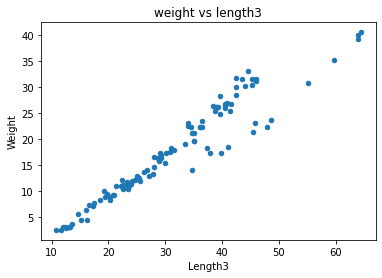

In [64]:
abc.plot.scatter(x='Length3', y='Weight', title='weight vs length3')

# Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

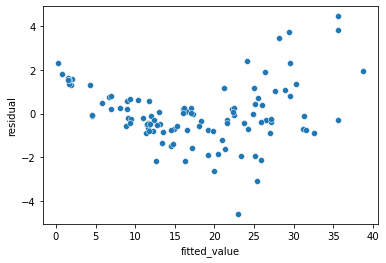

In [65]:
sns.scatterplot(x='fitted_value', y='residual',data=abc)

# Normality

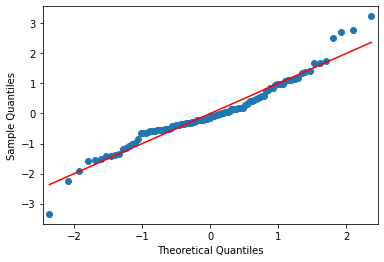

In [66]:
import statsmodels.api as sm
fig = sm.qqplot(abc['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID

<AxesSubplot:ylabel='Frequency'>

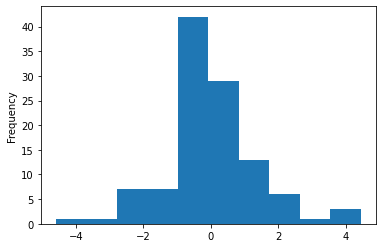

In [67]:
abc['residual'].plot.hist()

# test data

In [68]:
abc_test=pd.concat([X_test,y_test],axis=1)

abc_test.head()

,Length1,Length2,Length3,Height,Width,Weight
16,30.4,33.0,38.3,14.8604,5.2854,26.457513
4,26.5,29.0,34.0,12.4440,5.1340,20.736441
119,36.9,40.0,42.3,11.9286,7.1064,29.154759
34,38.0,41.0,46.5,17.6235,6.3705,30.822070
67,19.0,20.7,23.2,9.3960,3.4104,13.038405


In [69]:
abc_test['Prediction']=model.predict(abc_test) # predict = all row prediction ( Auto )
abc_test.head()

,Length1,Length2,Length3,Height,Width,Weight,Prediction
16,30.4,33.0,38.3,14.8604,5.2854,26.457513,24.137605
4,26.5,29.0,34.0,12.4440,5.1340,20.736441,21.317266
119,36.9,40.0,42.3,11.9286,7.1064,29.154759,28.675223
34,38.0,41.0,46.5,17.6235,6.3705,30.822070,30.588616
67,19.0,20.7,23.2,9.3960,3.4104,13.038405,12.399559


In [70]:
abc_test['Error']=abc_test.Weight-abc_test.Prediction
abc_test['Square_Error']=(abc_test.Error)*(abc_test.Error)
abc_test

,Length1,Length2,Length3,Height,Width,Weight,Prediction,Error,Square_Error
16,30.4,33.0,38.3,14.8604,5.2854,26.457513,24.137605,2.319908,5.381975
4,26.5,29.0,34.0,12.4440,5.1340,20.736441,21.317266,-0.580824,0.337357
119,36.9,40.0,42.3,11.9286,7.1064,29.154759,28.675223,0.479536,0.229955
34,38.0,41.0,46.5,17.6235,6.3705,30.822070,30.588616,0.233454,0.054501
67,19.0,20.7,23.2,9.3960,3.4104,13.038405,12.399559,0.638846,0.408124
15,29.4,32.0,37.2,15.4380,5.5800,24.494897,24.398707,0.096190,0.009253
135,40.0,42.5,45.5,6.8250,4.4590,22.583180,23.451251,-0.868071,0.753548
146,10.0,10.5,11.6,1.9720,1.1600,2.738613,0.907646,1.830966,3.352438
156,12.1,13.0,13.8,2.2770,1.2558,3.492850,2.134314,1.358536,1.845620
154,11.5,12.2,13.4,2.0904,1.3936,3.492850,2.182295,1.310555,1.717555


# RMSE

In [71]:
np.mean(abc_test.Square_Error)

1.2853646200052322

In [72]:
import math
rmse = math.sqrt(1.2853646200052322)
rmse

1.1337392204582288

In [73]:
from sklearn.metrics import mean_squared_error 
# calculate the mean squared error
model_mse = mean_squared_error(abc['Weight'],abc['fitted_value'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)

print("RMSE {:.3}".format(model_rmse)) #21

RMSE 1.37


# RMSE FOR TEST

In [74]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(abc_test['Weight'],abc_test['Prediction'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse)) #9

RMSE 1.13


##### Train Data : RMSE <= 10 then model is good fit

#####Test Data : RMSE <= 10 then model Performance is good